# Import Libraries and Modules

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import seaborn as sns

# Import and process the data

In [11]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
iris.species.replace(to_replace = 'setosa', value = 0, inplace = True)
iris.species.replace(to_replace = 'versicolor', value = 1, inplace = True)
iris.species.replace(to_replace = 'virginica', value = 2, inplace = True)

In [14]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Extracting sepal length and petal width for clustering

In [15]:
X = iris[['sepal_length', 'sepal_width']].values
y = iris['species'].values

In [16]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

# Standardizing the data

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

# Using Elbow Method to find optimal clusters

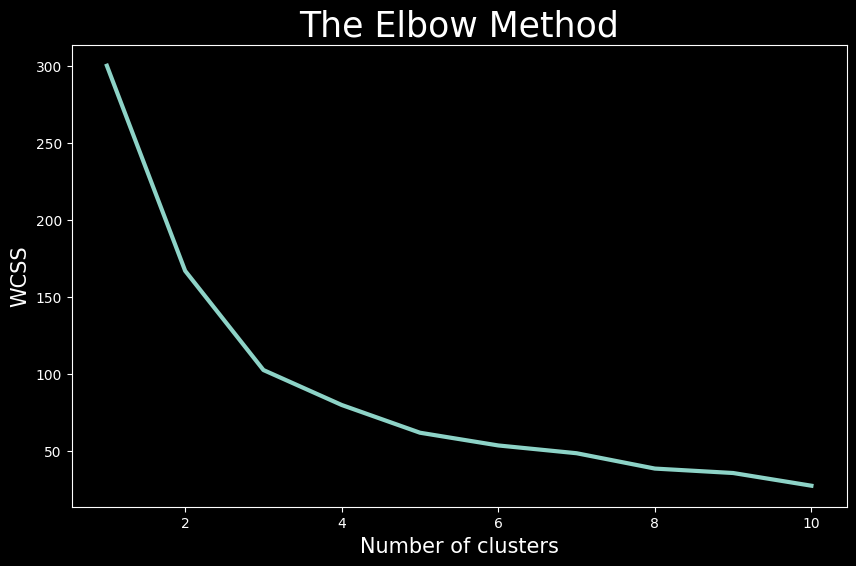

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 'auto', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # kmeans.inertia_ will give us wcss value
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss, lw = 3)
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize =15 )
plt.show()

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 'auto', random_state = 42)
y_pred = kmeans.fit_predict(X_scaled)

In [21]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

# Visualizing the clusters

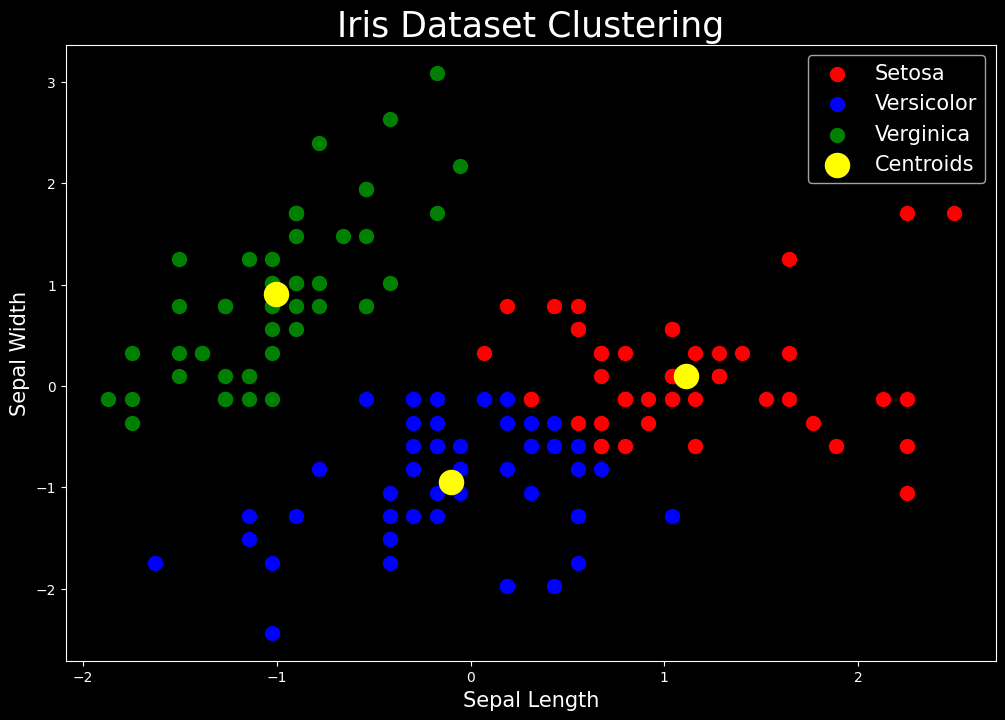

In [22]:
plt.figure(figsize = (12,8))
plt.scatter(X_scaled[y_pred == 0, 0], X_scaled[y_pred == 0, 1], s = 100, c = 'red', label = 'Setosa')
plt.scatter(X_scaled[y_pred == 1, 0], X_scaled[y_pred == 1, 1], s = 100, c = 'blue', label = 'Versicolor')
plt.scatter(X_scaled[y_pred == 2, 0], X_scaled[y_pred == 2, 1], s = 100, c = 'green', label = 'Verginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Iris Dataset Clustering', fontsize = 25)
plt.xlabel('Sepal Length', fontsize = 15)
plt.ylabel('Sepal Width', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [23]:
import sklearn
sklearn.metrics.calinski_harabasz_score(X_scaled, y_pred)

141.3769517409402

# Extracting all features of the dataset

In [25]:
X_f = iris.iloc[:,:-1]
X_f

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_f = scaler.fit_transform(X_f)
X_scaled_f

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# Applying PCA

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled_f)
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [28]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [29]:
print(np.sum(pca.explained_variance_ratio_))

0.9581320720000164


# Using Elbow Method to find the optimal clusters

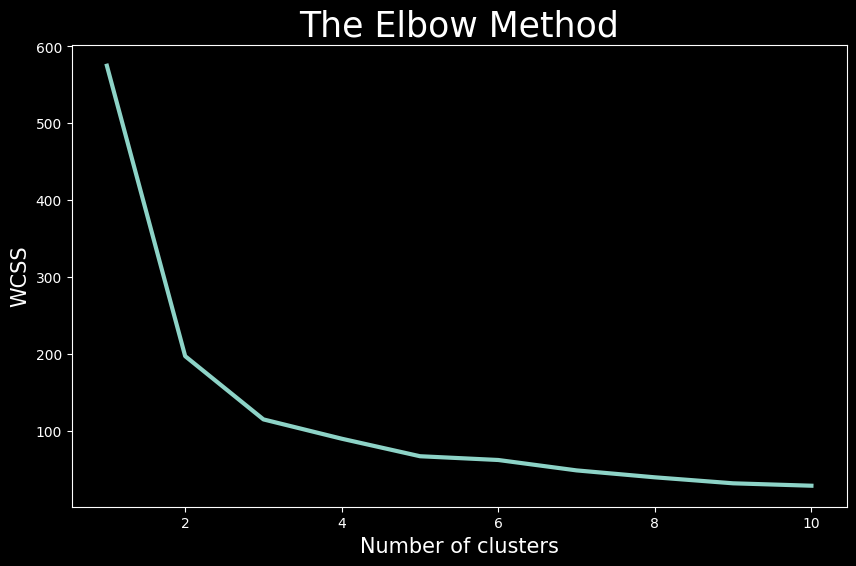

In [30]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 'auto', random_state = 42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_) # kmeans.inertia_ will give us wcss value
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss, lw = 3)
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize =15 )
plt.show()

# Applying K-Means Clustering

In [31]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 'auto', random_state = 42)
y_pred_pca = kmeans.fit_predict(X_pca)

# Visualizing the clusters

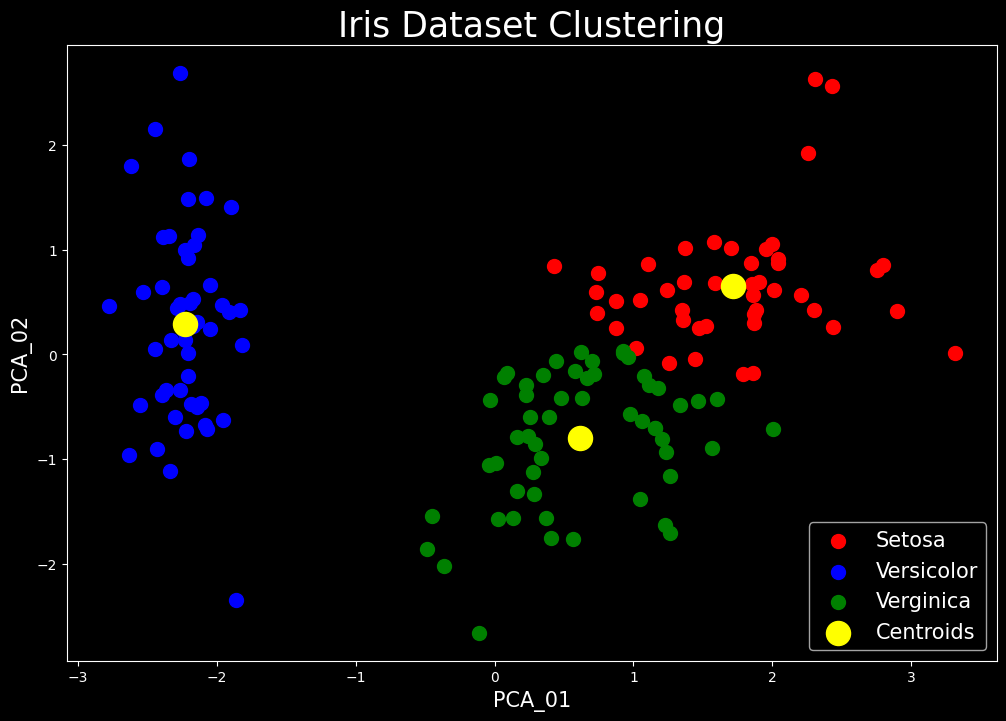

In [32]:
plt.figure(figsize = (12,8))
plt.scatter(X_pca[y_pred_pca == 0, 0], X_pca[y_pred_pca == 0, 1], s = 100, c = 'red', label = 'Setosa')
plt.scatter(X_pca[y_pred_pca == 1, 0], X_pca[y_pred_pca == 1, 1], s = 100, c = 'blue', label = 'Versicolor')
plt.scatter(X_pca[y_pred_pca == 2, 0], X_pca[y_pred_pca == 2, 1], s = 100, c = 'green', label = 'Verginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Iris Dataset Clustering', fontsize = 25)
plt.xlabel('PCA_01', fontsize = 15)
plt.ylabel('PCA_02', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [33]:
import sklearn
sklearn.metrics.calinski_harabasz_score(X_pca, y_pred_pca)

293.32801538290306